# Parameters

## Data Augment

In [10]:


import albumentations as A
train_aug = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=10, p=0.3),
])


/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
train_aug = A.Compose([
        # Geometric transformations (only flips)
        A.HorizontalFlip(p=0.5),
        
        # Color and contrast transformations
        A.OneOf([
            A.RandomBrightnessContrast(
                brightness_limit=0.2,
                contrast_limit=0.2,
                brightness_by_max=True,
                p=0.5
            ),
            A.HueSaturationValue(
                hue_shift_limit=10,
                sat_shift_limit=20,
                val_shift_limit=10,
                p=0.5
            ),
        ], p=0.7),
        
        # Noise and blur effects
        A.OneOf([
            A.GaussNoise( p=0.3),
            A.GaussianBlur(blur_limit=3, p=0.3),
            A.MotionBlur(blur_limit=3, p=0.2),
        ], p=0.4),
        
        # Weather and lighting effects
        A.OneOf([
            A.RandomGamma(gamma_limit=(80, 120), p=0.3),
            A.RandomFog(fog_coef_range = (0.1,0.3), alpha_coef=0.08, p=0.2),
            A.RandomShadow(
                shadow_roi=(0, 0.5, 1, 1),
                num_shadows_limit= (1,2),
                shadow_dimension=5,
                p=0.2
            ),
        ], p=0.3),
        
        # Color transformations
        A.OneOf([
            A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.3),
            A.ChannelShuffle(p=0.1),
            A.ToGray(p=0.1),
        ], p=0.3),
        
        # Advanced color adjustments
        A.ColorJitter(
            brightness=0.1,
            contrast=0.1,
            saturation=0.1,
            hue=0.05,
            p=0.4
        ),
        
        # Ensure output is in proper format
        A.Normalize(
            mean=[0.485, 0.456, 0.406],  # ImageNet stats (common for pretrained models)
            std=[0.229, 0.224, 0.225],
            max_pixel_value=255.0
        ),

])

In [12]:
train_aug = A.Compose([
        A.HorizontalFlip(p=0.25),
        A.ColorJitter(
            brightness=0.2,
            contrast=0.2,
            saturation=0.2,
            hue=0.1,
            p=0.7
        ),
        A.GaussianBlur(blur_limit=3, p=0.25),
        A.OneOf([
            A.RandomGamma(gamma_limit=(80, 120), p=0.3),
            A.RandomFog(fog_coef_range = (0.1,0.3), alpha_coef=0.08, p=0.2),
            A.RandomShadow(
                shadow_roi=(0, 0.5, 1, 1),
                num_shadows_limit= (1,2),
                shadow_dimension=5,
                p=0.2
            ),
        ], p=0.15),
        # A.Normalize(
        #     mean=[0.485, 0.456, 0.406],
        #     std=[0.229, 0.224, 0.225],
        #     max_pixel_value=255.0
        # ),
])

## Parameters

In [14]:
from keras.losses import Dice
from custom_metrics import custom_loss
from model_unet import Unet,VGG16_Unet

params={    
    'model_func' : VGG16_Unet,#VGG16_Unet,
    'model_params' : {
        'img_height' : 256,
        'img_width'  : 256,
        'nclasses'   : 8
    },
    # 'dataaug_dic':{
    #     'HorizontalFlip':0.5,
    #     'RandomBrightnessContrast':0.2,
    #     'Rotate':(10,0.3)


    # },
    'gen_params' : {'batch_size':4,
                    'augmentation_func' : train_aug
                    
                    },
    'train_step_per_epoch' : None, #sample/batch_size
    'val_step_per_epoch' : None,
    'patience':2,
    'num_epochs' :16,
    'training_description' : 'cityscape segmentation experiments',
    'loss' : 'binary_crossentropy' # custom_loss , 'categorical_crossentropy','binary_crossentropy',Dice
    }


# Run



In [1]:
from mlflow_tools import cityscape_experiment,start_local_experiment

start_local_experiment()

mlflow server --host 127.0.0.1  --port 8080 

                mlflow ui --backend-store-uri /mlruns


/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In train:

Number of images: 2975
Number of masks: 2975
Number of unique mask values: 16
Unique values: [ 0.  1.  3.  4.  7.  8. 11. 17. 20. 21. 22. 23. 24. 25. 26. 33.]
In val:

Number of images: 500
Number of masks: 500
Number of unique mask values: 14
Unique values: [ 1.  2.  3.  4.  7.  8. 11. 13. 17. 20. 21. 23. 24. 26.]
INFO:     127.0.0.1:55672 - "POST /api/2.0/mlflow/runs/create HTTP/1.1" 200 OK
INFO:     127.0.0.1:55672 - "POST /api/2.0/mlflow/runs/log-parameter HTTP/1.1" 200 OK
INFO:     127.0.0.1:55672 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:55672 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK


2025/10/17 11:34:32 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'cityscape_generator.CityscapeDataGenerator'>. Dataset logging skipped.
2025/10/17 11:34:32 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'cityscape_generator.CityscapeDataGenerator'>. Dataset logging skipped.


INFO:     127.0.0.1:55672 - "POST /api/2.0/mlflow/logged-models HTTP/1.1" 200 OK


/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


INFO:     127.0.0.1:55672 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK


INFO:     127.0.0.1:55672 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:55672 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/model_summary.txt HTTP/1.1" 200 OK
Epoch 1/16


2025-10-17 11:34:41.116154: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-17 11:34:41.447003: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-17 11:34:41.761238: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-17 11:34:41.775191: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng12{k11=2} for conv %cudnn-conv-bias-activation.70 = (f32[4,256,64,64]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,128,64,64]{3,2,1,0} %bitcast.16843, f32[256,128,3,3]{3,2,1,0} %bitcast.16850, 

743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.7690 - dice_coeff: 0.4627 - loss: 0.5191 - mean_io_u: 0.4375INFO:     127.0.0.1:48456 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:48456 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:48456 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:48464 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:48464 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:48464 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:48456 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     1

INFO:     127.0.0.1:48464 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 301s 382ms/step - accuracy: 0.7691 - dice_coeff: 0.4628 - loss: 0.5190 - mean_io_u: 0.4375 - val_accuracy: 0.8217 - val_dice_coeff: 0.6347 - val_loss: 0.3479 - val_mean_io_u: 0.4375
Epoch 2/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8507 - dice_coeff: 0.6619 - loss: 0.3021 - mean_io_u: 0.4379INFO:     127.0.0.1:57638 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:57638 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:57638 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:57650 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8

INFO:     127.0.0.1:57650 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:57638 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:57638 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:57650 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:57650 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 270s 362ms/step - accuracy: 0.8507 - dice_coeff: 0.6619 - loss: 0.3021 - mean_io_u: 0.4379 - val_accuracy: 0.8555 - val_dice_coeff: 0.7750 - val_loss: 0.2274 - val_mean_io_u: 0.4425
Epoch 3/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8644 - dice_coeff: 0.7512 - lo

INFO:     127.0.0.1:57276 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 268s 361ms/step - accuracy: 0.8644 - dice_coeff: 0.7513 - loss: 0.2087 - mean_io_u: 0.4393 - val_accuracy: 0.8612 - val_dice_coeff: 0.7975 - val_loss: 0.1685 - val_mean_io_u: 0.4437
Epoch 4/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8695 - dice_coeff: 0.7949 - loss: 0.1599 - mean_io_u: 0.4415INFO:     127.0.0.1:37962 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:37962 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:37962 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:37976 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8

INFO:     127.0.0.1:37976 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:37976 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:37962 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:37976 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:37976 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 269s 361ms/step - accuracy: 0.8695 - dice_coeff: 0.7949 - loss: 0.1599 - mean_io_u: 0.4416 - val_accuracy: 0.8660 - val_dice_coeff: 0.8204 - val_loss: 0.1376 - val_mean_io_u: 0.4519
Epoch 5/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.8796 - dice_coeff: 0.8249 - lo

INFO:     127.0.0.1:51770 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:51764 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:51764 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:51770 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:51770 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 266s 358ms/step - accuracy: 0.8796 - dice_coeff: 0.8249 - loss: 0.1292 - mean_io_u: 0.4442 - val_accuracy: 0.8672 - val_dice_coeff: 0.8293 - val_loss: 0.1221 - val_mean_io_u: 0.4570
Epoch 6/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.8808 - dice_coeff: 0.8370 - lo

INFO:     127.0.0.1:44098 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:44082 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:44098 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:44098 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 265s 356ms/step - accuracy: 0.8808 - dice_coeff: 0.8370 - loss: 0.1128 - mean_io_u: 0.4474 - val_accuracy: 0.8699 - val_dice_coeff: 0.8269 - val_loss: 0.1090 - val_mean_io_u: 0.4452
Epoch 7/16
741/743 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8863 - dice_coeff: 0.8511 - loss: 0.0998 - mean_io_u: 0.4497INFO:     127.0.0.1:45666 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de0

INFO:     127.0.0.1:45678 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:45666 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:45666 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:45678 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:45678 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 270s 363ms/step - accuracy: 0.8863 - dice_coeff: 0.8511 - loss: 0.0998 - mean_io_u: 0.4498 - val_accuracy: 0.8647 - val_dice_coeff: 0.8275 - val_loss: 0.1058 - val_mean_io_u: 0.4512
Epoch 8/16
737/743 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.8890 - dice_coeff: 0.8594 - lo

INFO:     127.0.0.1:41328 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:41316 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:41316 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:41328 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:41328 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 271s 364ms/step - accuracy: 0.8890 - dice_coeff: 0.8595 - loss: 0.0917 - mean_io_u: 0.4527 - val_accuracy: 0.8716 - val_dice_coeff: 0.8386 - val_loss: 0.0979 - val_mean_io_u: 0.4626
Epoch 9/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8919 - dice_coeff: 0.8659 - lo

INFO:     127.0.0.1:43448 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:43436 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:43436 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:43448 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:43448 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 261s 351ms/step - accuracy: 0.8919 - dice_coeff: 0.8659 - loss: 0.0853 - mean_io_u: 0.4556 - val_accuracy: 0.8802 - val_dice_coeff: 0.8570 - val_loss: 0.0897 - val_mean_io_u: 0.4587
Epoch 10/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.8934 - dice_coeff: 0.8699 - l

INFO:     127.0.0.1:37200 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:37196 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:37196 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:37200 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:37200 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 262s 352ms/step - accuracy: 0.8934 - dice_coeff: 0.8699 - loss: 0.0818 - mean_io_u: 0.4571 - val_accuracy: 0.8791 - val_dice_coeff: 0.8600 - val_loss: 0.0872 - val_mean_io_u: 0.4550
Epoch 11/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8930 - dice_coeff: 0.8712 - l

INFO:     127.0.0.1:47164 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:47152 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:47152 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:47164 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:47164 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 264s 354ms/step - accuracy: 0.8930 - dice_coeff: 0.8712 - loss: 0.0799 - mean_io_u: 0.4594 - val_accuracy: 0.8817 - val_dice_coeff: 0.8647 - val_loss: 0.0838 - val_mean_io_u: 0.4676
Epoch 12/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.8984 - dice_coeff: 0.8784 - l

INFO:     127.0.0.1:50586 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:50570 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:50570 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:50586 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:50586 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 264s 356ms/step - accuracy: 0.8988 - dice_coeff: 0.8797 - loss: 0.0729 - mean_io_u: 0.4628 - val_accuracy: 0.8823 - val_dice_coeff: 0.8585 - val_loss: 0.0816 - val_mean_io_u: 0.4552
Epoch 14/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9023 - dice_coeff: 0.8840 - l

INFO:     127.0.0.1:37508 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 265s 356ms/step - accuracy: 0.9022 - dice_coeff: 0.8840 - loss: 0.0701 - mean_io_u: 0.4639 - val_accuracy: 0.8800 - val_dice_coeff: 0.8603 - val_loss: 0.0813 - val_mean_io_u: 0.4673
Epoch 15/16
743/743 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9017 - dice_coeff: 0.8838 - loss: 0.0692 - mean_io_u: 0.4654INFO:     127.0.0.1:56666 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:56666 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:56666 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:56682 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b

INFO:     127.0.0.1:56666 - "POST /api/2.0/mlflow/runs/set-tag HTTP/1.1" 200 OK
INFO:     127.0.0.1:56666 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint_metrics.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:56682 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:56682 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/checkpoints/latest_checkpoint.h5 HTTP/1.1" 200 OK
743/743 ━━━━━━━━━━━━━━━━━━━━ 266s 357ms/step - accuracy: 0.9017 - dice_coeff: 0.8838 - loss: 0.0692 - mean_io_u: 0.4654 - val_accuracy: 0.8865 - val_dice_coeff: 0.8666 - val_loss: 0.0771 - val_mean_io_u: 0.4628
Epoch 16/16
735/743 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 0.9033 - dice_coeff: 0.8859 - loss: 0.0678 - mean_io_u: 0.4667INFO:     127.0.0.1:41050 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de

2025/10/17 12:45:42 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: unsupported operand type(s) for *: 'slice' and 'int'
2025/10/17 12:45:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


INFO:     127.0.0.1:41060 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:41050 - "GET /api/2.0/mlflow/logged-models/m-ee708a1549cc4dfd8e36e4c028f8c550 HTTP/1.1" 200 OK
INFO:     127.0.0.1:41050 - "POST /api/2.0/mlflow/runs/outputs HTTP/1.1" 200 OK
INFO:     127.0.0.1:41050 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:41050 - "GET /api/2.0/mlflow/metrics/get-history?run_uuid=aecd0d8566674e6b8de06ca604c78a52&metric_key=accuracy&run_id=aecd0d8566674e6b8de06ca604c78a52&max_results=25000 HTTP/1.1" 200 OK
INFO:     127.0.0.1:41050 - "GET /api/2.0/mlflow/metrics/get-history?run_uuid=aecd0d8566674e6b8de06ca604c78a52&metric_key=dice_coeff&run_id=aecd0d8566674e6b8de06ca604c78a52&max_results=25000 HTTP/1.1" 200 OK
INFO:     127.0.0.1:41050 - "GET /api/2.0/mlflow/metrics/get-history?run_uuid=aecd0d8566674e6b8de06ca604c78a52&metric_key=loss&run_id=aecd0d8566674e6b8d

2025/10/17 12:45:45 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:     127.0.0.1:41050 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK


2025/10/17 12:46:03 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp_femu2gz/model, flavor: tensorflow). Fall back to return ['tensorflow==2.19.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/10/17 12:46:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


INFO:     127.0.0.1:55628 - "GET /api/2.0/mlflow/logged-models/m-ee708a1549cc4dfd8e36e4c028f8c550 HTTP/1.1" 200 OK
INFO:     127.0.0.1:55628 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-ee708a1549cc4dfd8e36e4c028f8c550/artifacts/conda.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:55628 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-ee708a1549cc4dfd8e36e4c028f8c550/artifacts/python_env.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:55628 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-ee708a1549cc4dfd8e36e4c028f8c550/artifacts/MLmodel HTTP/1.1" 200 OK
INFO:     127.0.0.1:55628 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-ee708a1549cc4dfd8e36e4c028f8c550/artifacts/requirements.txt HTTP/1.1" 200 OK
INFO:     127.0.0.1:55628 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-ee708a1549cc4dfd8e36e4c028f8c550/artifacts/data/model.keras HTTP/1.1" 200 OK
INFO:     127.0.0.1:55628 - "PU

2025-10-17 12:46:24.030658: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-17 12:46:24.343477: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
INFO:     127.0.0.1:51132 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/aecd0d8566674e6b8de06ca604c78a52/artifacts/prediction_test.png HTTP/1.1" 200 OK
INFO:     127.0.0.1:51132 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:51132 - "POST /api/2.0/mlflow/logged-models HTTP/1.1" 200 OK
INFO:     127.0.0.1:51132 - "POST /api/2.0/mlflow/runs/outputs HTTP/1.1" 200 OK
INFO:     127.0.0.1:51132 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
INFO:     127.0.0.1:51132 - "GET /api/2.0/mlflow/metrics/get-history?run_uuid=aecd0d8566674e6b8de06ca604c78a52&metric_key=accuracy&run_id=aecd0d8566674e6b8de06ca604c78a5

2025/10/17 12:46:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


INFO:     127.0.0.1:51132 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK


2025/10/17 12:46:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp2cofo0uq/model, flavor: keras). Fall back to return ['keras==3.10.0']. Set logging level to DEBUG to see the full traceback. 
2025/10/17 12:46:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


INFO:     127.0.0.1:36554 - "GET /api/2.0/mlflow/logged-models/m-e10a4aadfd134761afae62caa1da0748 HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-e10a4aadfd134761afae62caa1da0748/artifacts/conda.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-e10a4aadfd134761afae62caa1da0748/artifacts/python_env.yaml HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-e10a4aadfd134761afae62caa1da0748/artifacts/MLmodel HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-e10a4aadfd134761afae62caa1da0748/artifacts/requirements.txt HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "PUT /api/2.0/mlflow-artifacts/artifacts/372886525690534527/models/m-e10a4aadfd134761afae62caa1da0748/artifacts/data/model.keras HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "PU

Registered model 'VGG16_Unet' already exists. Creating a new version of this model...
2025/10/17 12:46:59 ERROR mlflow.webhooks.delivery: Failed to deliver webhook for event model_version.created: FileStore does not support list_webhooks_by_event
Traceback (most recent call last):
  File "/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/mlflow/webhooks/delivery.py", line 304, in deliver_webhook
    _deliver_webhook_impl(event=event, payload=payload, store=store)
  File "/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/mlflow/webhooks/delivery.py", line 285, in _deliver_webhook_impl
    webhooks = _get_cached_webhooks_by_event(store, event, ttl_seconds)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/d0t/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/mlflow/webhooks/delivery.py", line 249, in _get_cached_webhooks_by_event
    page = store.list_webhooks_by_event(event, max_results=100, page_token=page_token)
           

INFO:     127.0.0.1:36554 - "POST /api/2.0/mlflow/model-versions/create HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "GET /api/2.0/mlflow/logged-models/m-e10a4aadfd134761afae62caa1da0748 HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "GET /api/2.0/mlflow/logged-models/m-e10a4aadfd134761afae62caa1da0748 HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "PATCH /api/2.0/mlflow/logged-models/m-e10a4aadfd134761afae62caa1da0748/tags HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "POST /api/2.0/mlflow/runs/log-batch HTTP/1.1" 200 OK
INFO:     127.0.0.1:36554 - "GET /api/2.0/mlflow/runs/get?run_uuid=aecd0d8566674e6b8de06ca604c78a52&run_id=aecd0d8566674e6b8de06ca604c78a52 HTTP/1.1" 200 OK
🏃 View run marvelous-rat-897 at: http://127.0.0.1:8080/#/experiments/372886525690534527/runs/aecd0d8566674e6b8de06ca604c78a52
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/372886525690534527
INFO:     127.0.0.1:36554 - "POST /api/2.0/mlflow/runs/update HTTP/1.1" 200 OK


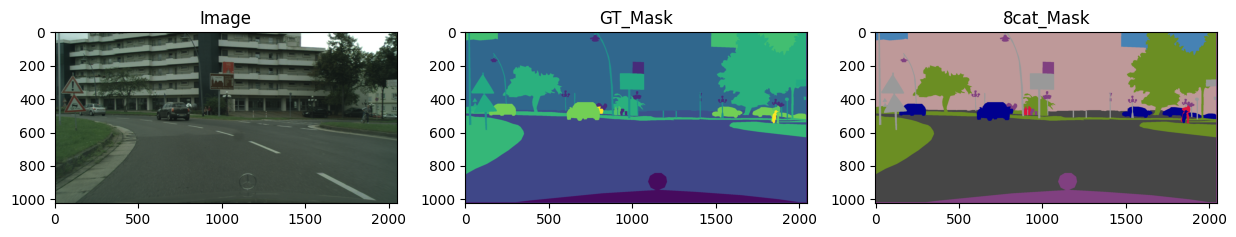

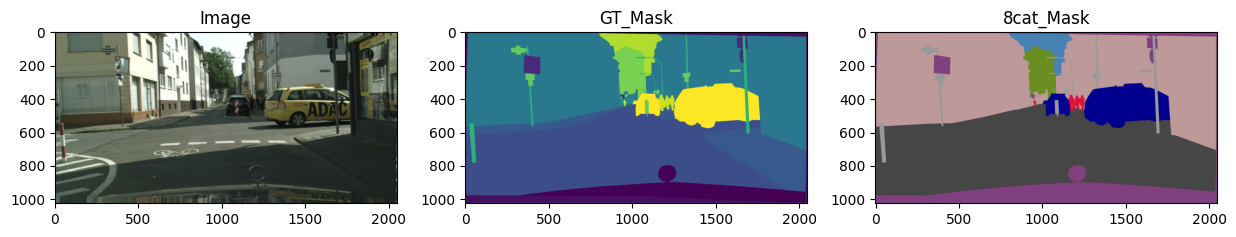

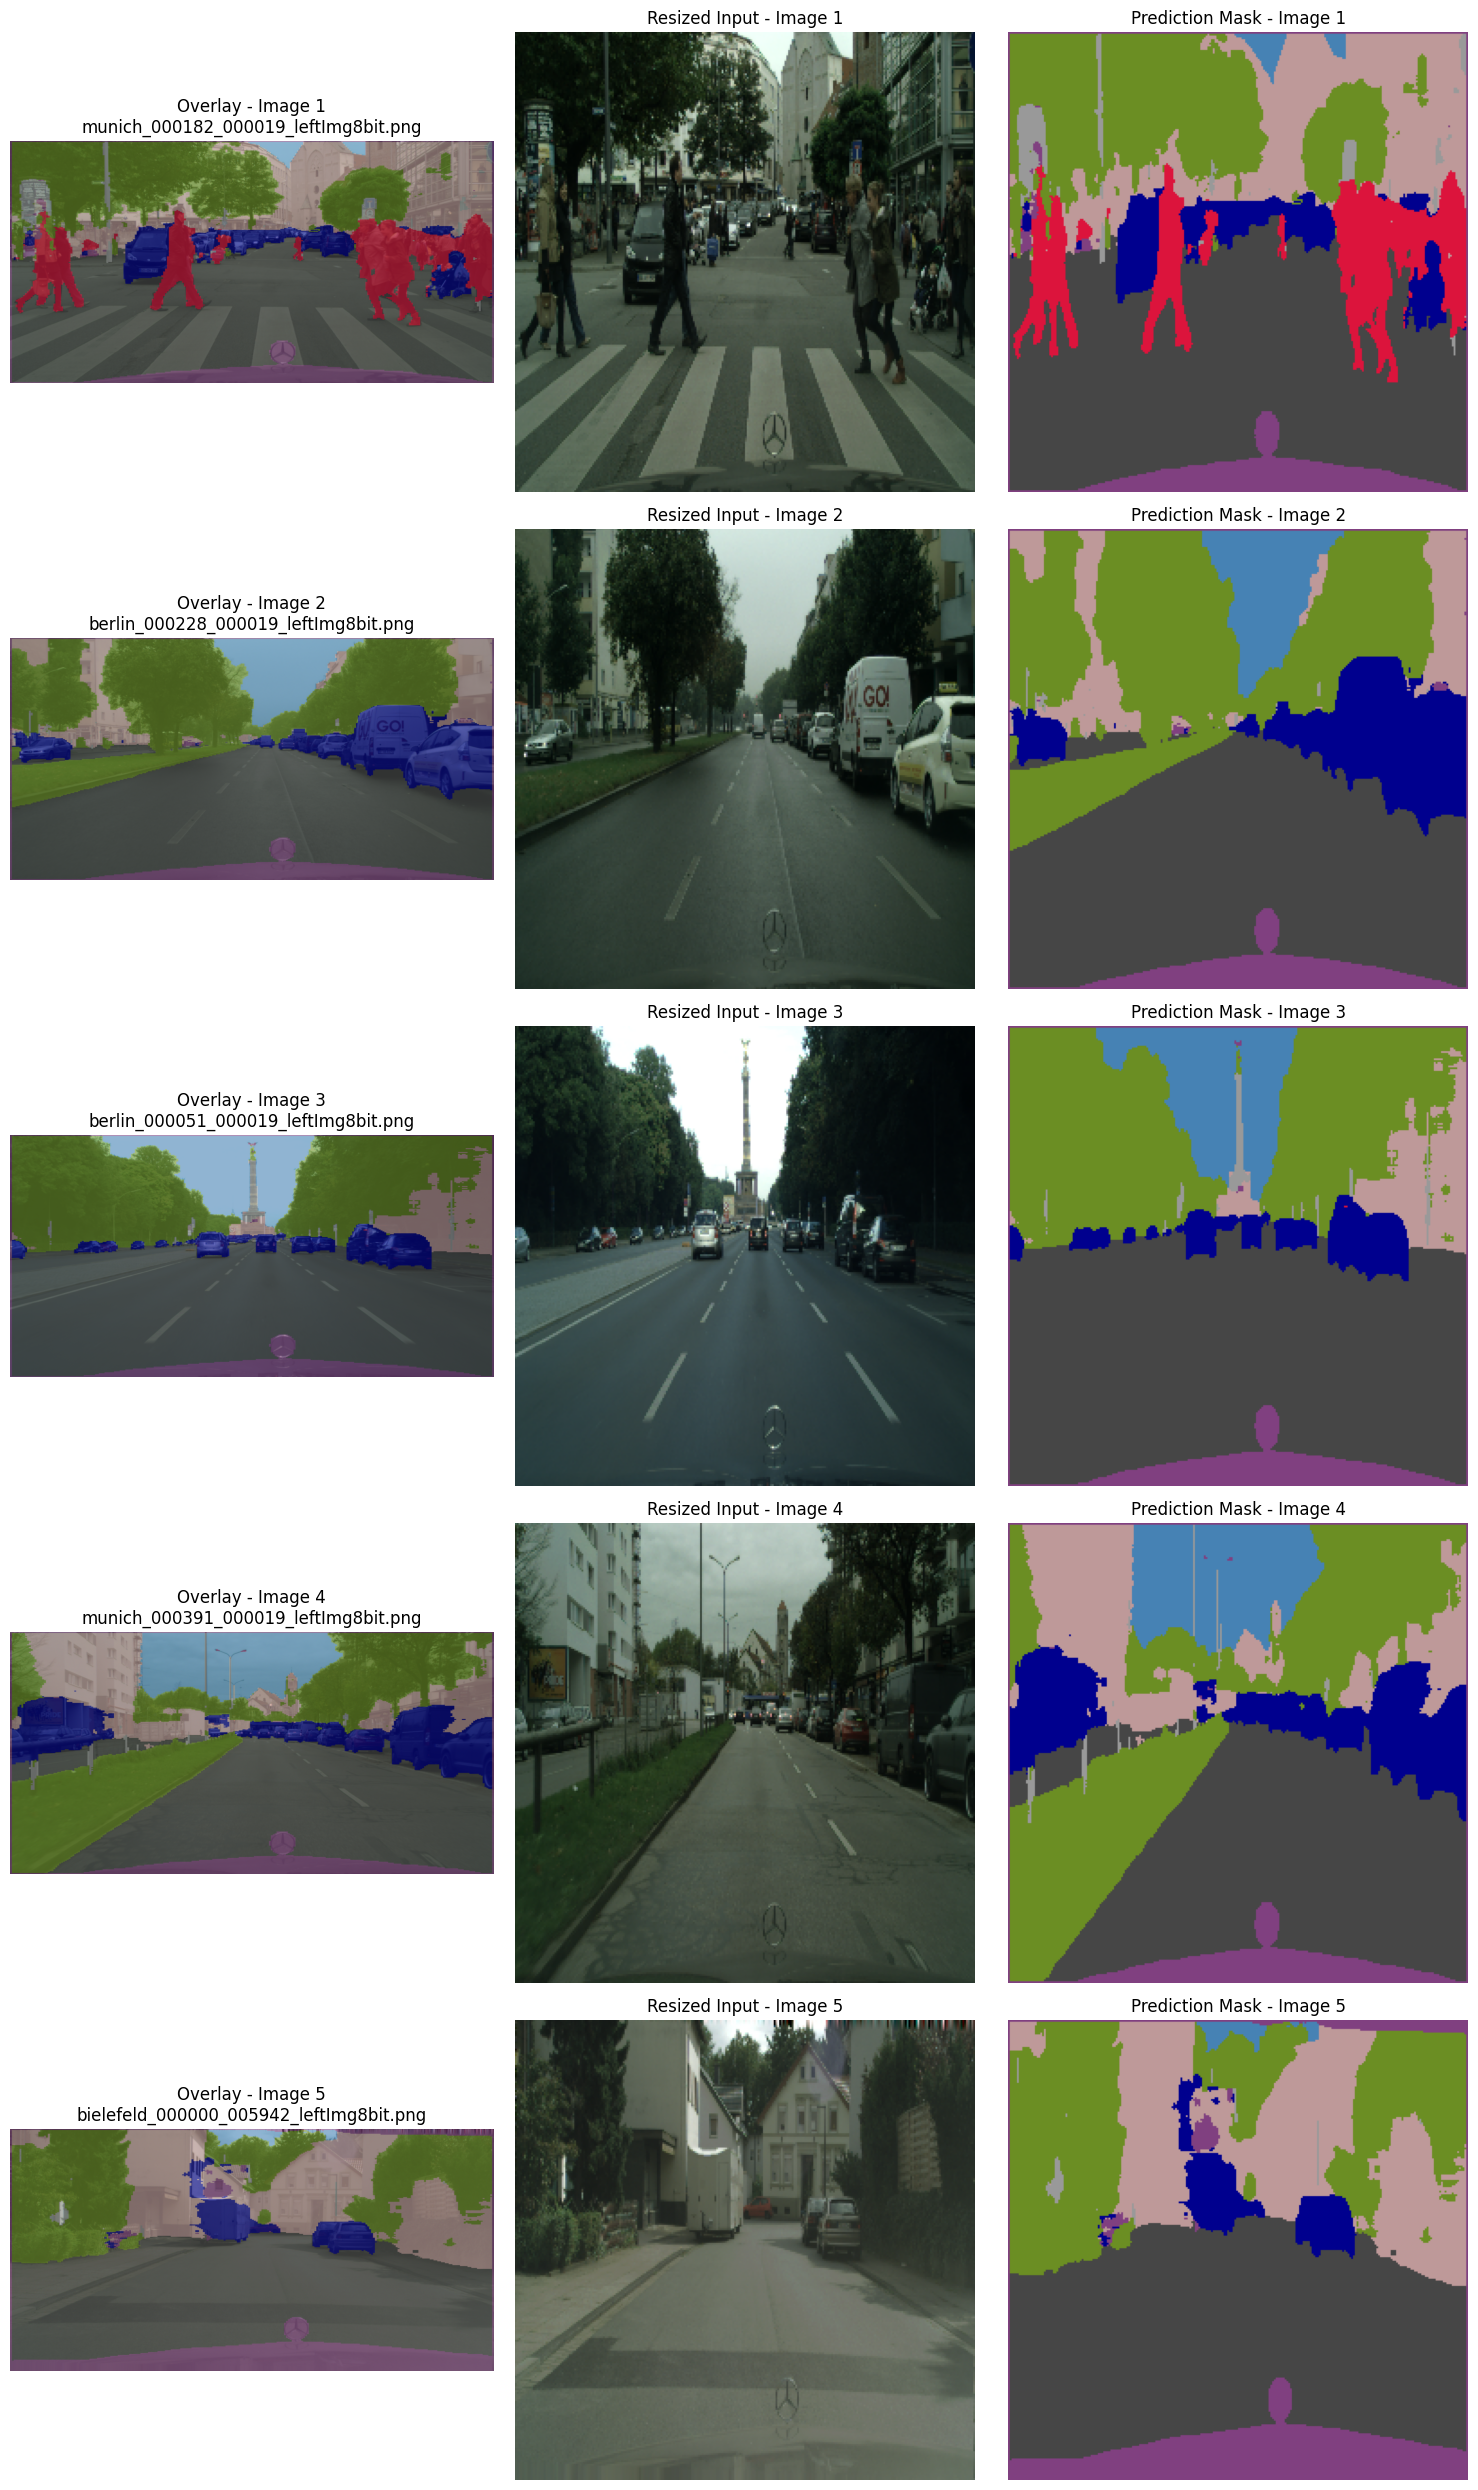

In [16]:
from mlflow_tools import cityscape_experiment
cityscape_experiment(**params)